In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [ ]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/PotatoDataSet.zip'

# Specify the directory where you want to extract the contents
extract_dir = '/content'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction completed!")


Extraction completed!


In [ ]:
# Direct paths to data directories
train_dir = "/content/PotatoDataSet/Train"  # Replace with the actual path to your train folder
valid_dir = "/content/PotatoDataSet/Valid"  # Replace with the actual path to your valid folder
test_dir = "/content/PotatoDataSet/Test"    # Replace with the actual path to your test folder


In [ ]:
# Parameters
img_height = 224
img_width = 224
batch_size = 32
num_classes = 3

In [ ]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
# Loading the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = valid_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
print(train_generator.class_indices)
print(valid_generator.class_indices)
print(test_generator.class_indices)


Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
{'Early_blight': 0, 'Healthy': 1, 'Late_blight': 2}
{'Early_blight': 0, 'Healthy': 1, 'Late_blight': 2}
{'Early_blight': 0, 'Healthy': 1, 'Late_blight': 2}


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

CNN_Classifier = Sequential([
    # Step 1 - Convolution and Pooling
    Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    # Step 2 - Additional Convolution and Pooling
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Step 3 - Flattening
    Flatten(),

    # Step 4 - Fully Connected Layers
    Dense(128, activation='relu'),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='relu'),

    # Output Layer
    Dense(3, activation='softmax')
])
CNN_Classifier.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 16)        │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 46656)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,972,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,988,051 (22.84 MB)

 Trainable params: 5,988,051 (22.84 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import backend as K

# Clear any session-related cache
K.clear_session()

In [ ]:
print("Training data size:", len(train_generator.filenames))
print("Validation data size:", len(valid_generator.filenames))


Training data size: 900
Validation data size: 300


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',           # Monitor validation loss
    patience=5,                    # Stop training if no improvement in 5 consecutive epochs
    restore_best_weights=True     # Restore the best model weights when training stops
)

# Compile the model
CNN_Classifier.compile(
    optimizer='adam',               # Adam optimizer is often a good choice
    loss='categorical_crossentropy', # Categorical crossentropy for multi-class classification
    metrics=['accuracy']            # Metrics to evaluate during training
)

# Train the model with EarlyStopping
history = CNN_Classifier.fit(
    train_generator,               # Training data generator
    epochs=50,                     # Number of epochs (EarlyStopping will stop early if needed)
    validation_data=valid_generator,  # Validation data generator
    callbacks=[early_stopping]     # Apply the early stopping callback
)

# Save the model after training
CNN_Classifier.save('/content/cnn_model.h5')


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 389ms/step - accuracy: 0.7043 - loss: 0.7875 - val_accuracy: 0.8567 - val_loss: 0.5338
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 322ms/step - accuracy: 0.8693 - loss: 0.4709 - val_accuracy: 0.8367 - val_loss: 0.3697
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.8772 - loss: 0.3314 - val_accuracy: 0.8733 - val_loss: 0.3233
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 275ms/step - accuracy: 0.9123 - loss: 0.2603 - val_accuracy: 0.8233 - val_loss: 0.3773
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 339ms/step - accuracy: 0.8165 - loss: 0.4337 - val_accuracy: 0.9100 - val_loss: 0.2211
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 285ms/step - accuracy: 0.9163 - loss: 0.2446 - val_accuracy: 0.8267 - val_loss: 0.4324
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 267ms/step - accuracy: 0.9058 - loss: 0.2270 - val_accuracy: 0.9000 - val_loss: 0.2554
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 306ms/step - accuracy: 0.9368 - loss: 0.1719 - val_accu

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = CNN_Classifier.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9626 - loss: 0.1488
Test Accuracy: 93.00%
Test Loss: 0.2161


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


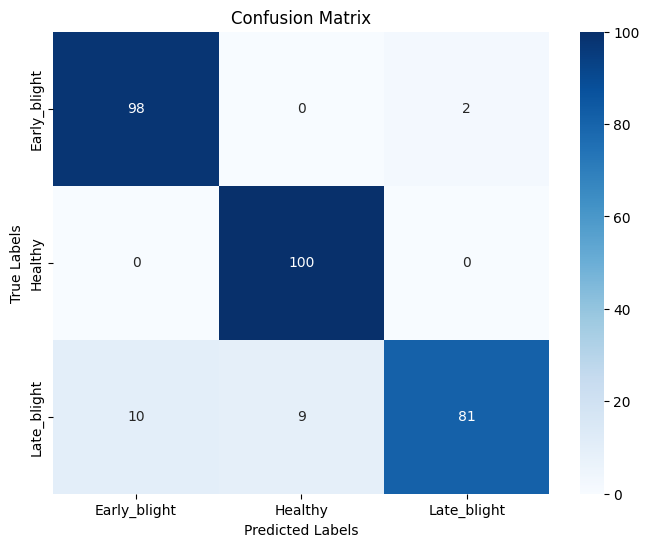

Classification Report:
               precision    recall  f1-score   support

Early_blight       0.91      0.98      0.94       100
     Healthy       0.92      1.00      0.96       100
 Late_blight       0.98      0.81      0.89       100

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [ ]:
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Step 2: Generate predictions
test_generator.reset()  # Ensure generator starts from the beginning
predictions = CNN_Classifier.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Step 3: Get true labels
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Get class names

# Step 4: Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Classification Report
report = classification_report(true_labels, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)



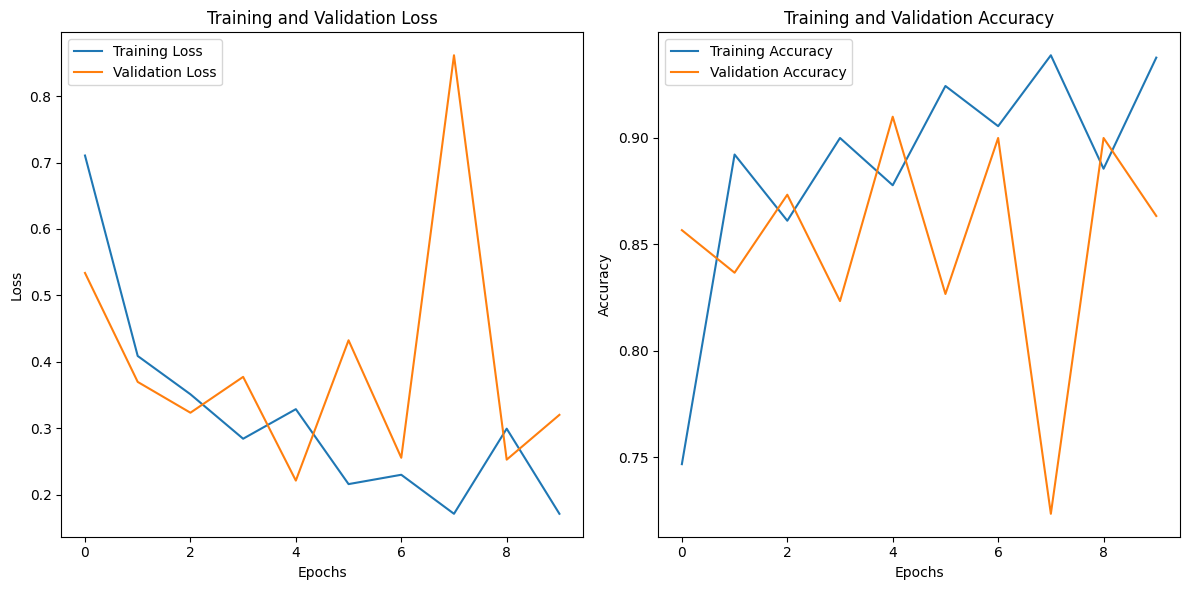

In [ ]:
import matplotlib.pyplot as plt

# Extract the loss and accuracy values from the history object
history_dict = history.history

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (output) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(3, activation='softmax')(x)  # 3 output neurons for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=x)
model.summary()
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
              metrics=['accuracy'])





58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,138,243 (80.64 MB)

 Trainable params: 6,423,555 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras import backend as K

# Clear any session-related cache
K.clear_session()

In [ ]:
# Train the model with early stopping
history = model.fit(
    train_generator,
    epochs=12,  # Adjust epochs as needed
    validation_data=valid_generator
)

# Save the trained model
model.save('/content/vgg16_multi.h5')


Epoch 1/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 835ms/step - accuracy: 0.4859 - loss: 1.1886 - val_accuracy: 0.8800 - val_loss: 0.4788
Epoch 2/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 395ms/step - accuracy: 0.7862 - loss: 0.5370 - val_accuracy: 0.8967 - val_loss: 0.3427
Epoch 3/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 333ms/step - accuracy: 0.8244 - loss: 0.4416 - val_accuracy: 0.8833 - val_loss: 0.3316
Epoch 4/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 392ms/step - accuracy: 0.8597 - loss: 0.3655 - val_accuracy: 0.7933 - val_loss: 0.3964
Epoch 5/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 344ms/step - accuracy: 0.8687 - loss: 0.3617 - val_accuracy: 0.8467 - val_loss: 0.3456
Epoch 6/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 403ms/step - accuracy: 0.8740 - loss: 0.3434 - val_accuracy: 0.8233 - val_loss: 0.3846
Epoch 7/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 466ms/step - accuracy: 0.8782 - loss: 0.3276 - val_accuracy: 0.9300 - val_loss: 0.2006
Epoch 8/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 396ms/step - accuracy: 0.8944 - loss: 0.2872 - val_accu

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.9426 - loss: 0.1852
Test Accuracy: 96.67%
Test Loss: 0.1403


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step


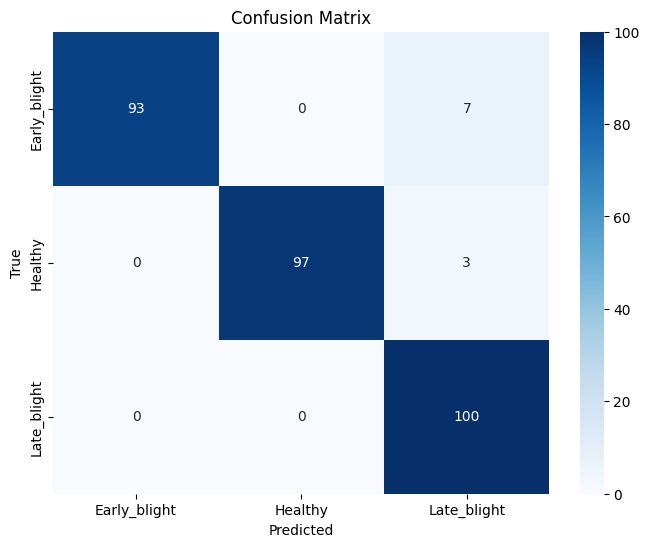

Classification Report:
               precision    recall  f1-score   support

Early_blight       1.00      0.93      0.96       100
     Healthy       1.00      0.97      0.98       100
 Late_blight       0.91      1.00      0.95       100

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the generator and generate predictions
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from the test generator
true_labels = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Classification Report
report = classification_report(true_labels, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)


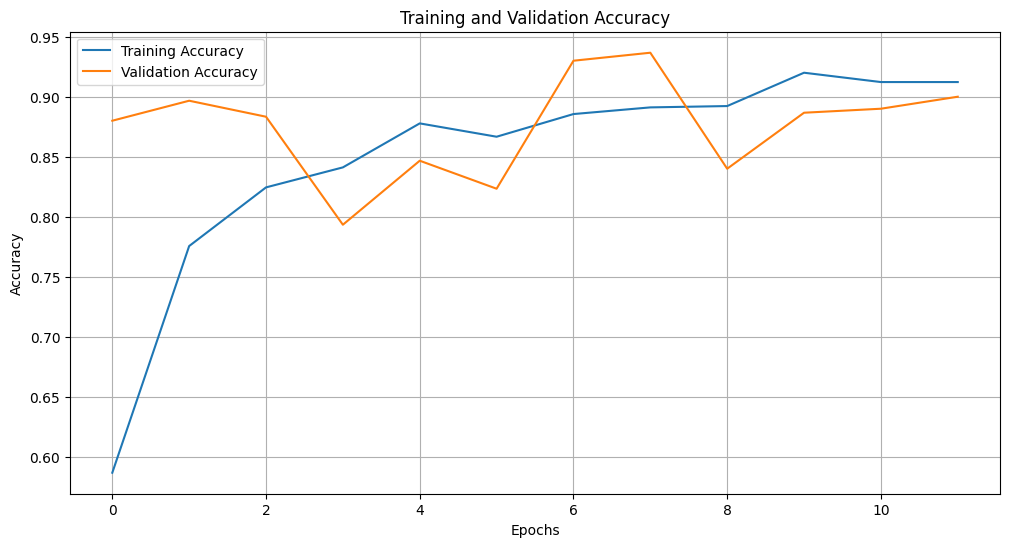

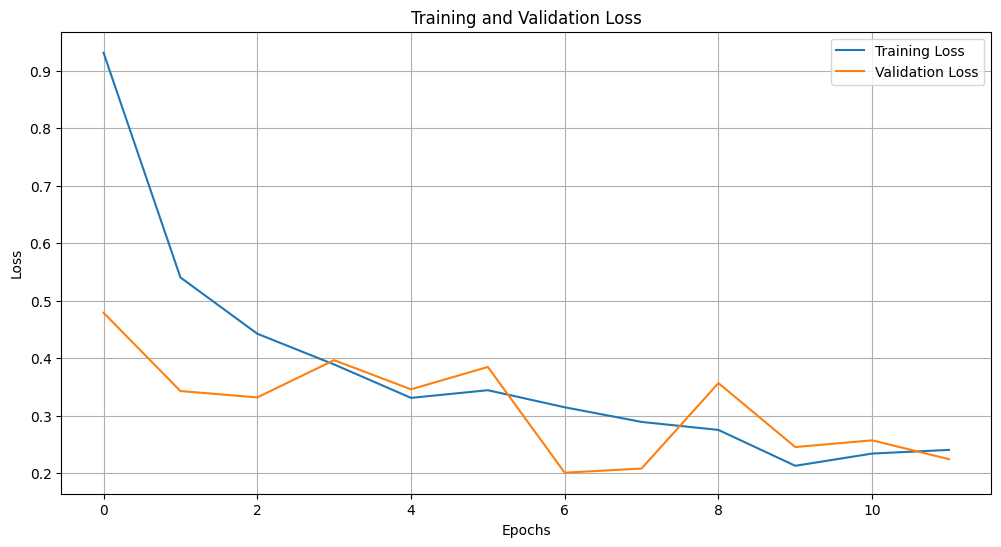

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
